In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import os
from PIL import Image
import torchvision.transforms as T

import constants

In [2]:
image_path = os.path.join(constants.PROCESSED_DATA_PATH, 'slices_80_120', 'train')

In [3]:
def apply_transforms(slice_, transforms=[]):
    transforms = T.Compose(
        transforms + [T.Resize([200, 200]), T.ToTensor()]
    )
    return transforms(slice_).numpy()

In [4]:
slice_1_path = os.path.join(image_path, 'pos', 'Stanford_Case28_01_116.npy')
slice_1 = np.load(slice_1_path)

slice_2_path = os.path.join(image_path, 'neg', 'Stanford_Case25_03_100.npy')
slice_2 = np.load(slice_2_path)

In [5]:
def display_transforms(slice_):
    all_transforms = [
        ([], 'original'),
        ([T.RandomVerticalFlip(p=1)], 'vertical flip'),
        ([T.RandomHorizontalFlip(p=1)], 'horizontal flip'),
        ([T.RandomCrop(size=(175, 896))], 'random crop 175x896'),
        ([T.RandomRotation(degrees=10, resample=False, expand=False, center=None)], 'random rotation'),
        ([T.ColorJitter(0.5, 0.5, 0.5, 0.1)], 'color jitter')
    ]
    
    for i, (t, c) in enumerate(all_transforms):
        plt.subplot(2, 3, i + 1)
        plt.imshow(apply_transforms(Image.fromarray(slice_), t).squeeze(), cmap='gray')
        plt.title(c)
        
    plt.tight_layout()

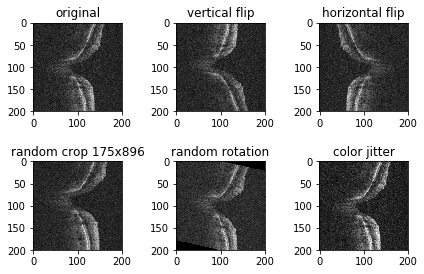

In [6]:
display_transforms(slice_1)

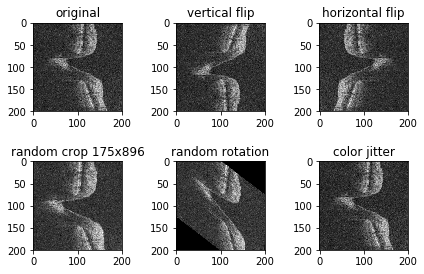

In [7]:
display_transforms(slice_2)